# Plots of sentence sorting

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition

import src.sent_encoder

%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv("../data/bencini-goldberg.csv")

In [3]:
enc = src.sent_encoder.SentEncoder()

In [ ]:
sent_vecs = enc.sentence_vecs(df.sentence.tolist())

num_layers = sent_vecs.shape[1]

## PCA plot (dim=2)

In [5]:
layer = 11
pca_model = sklearn.decomposition.PCA(n_components=2)
pca_vecs = pca_model.fit_transform(sent_vecs[:, layer])

In [6]:
pca_vecs.shape

(16, 2)

In [7]:
df['PC1'] = pca_vecs[:, 0]
df['PC2'] = pca_vecs[:, 1]

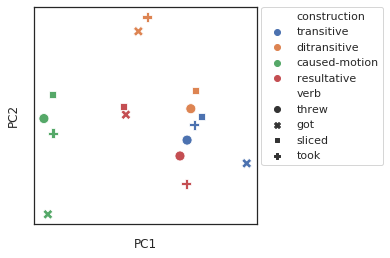

In [8]:
sns.set(rc={'figure.figsize':(4, 4)})
sns.set_style('white')
g = sns.scatterplot(x=df.PC1, y=df.PC2, hue=df.construction, style=df.verb, s=100)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.rc('hatch', linewidth=0)
#plt.savefig("pca-30B.svg", bbox_inches='tight', format='svg')
plt.show()